<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks-2.ipynb)

The previous notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np,pandas as pd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.models import Sequential,Model
from keras.optimizers import SGD,RMSprop
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid'); path='../input/'
fw='weights.passnyc.hdf5'

Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show()

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

In [7]:
features1=school_explorer[numeric_list].values
features2=school_explorer[numeric_list+category_list]
targets1=school_explorer['Average Math Proficiency'].values
targets2=school_explorer['Average ELA Proficiency'].values
features_enc=features2
encode=OneHotEncoder(sparse=False)
for column in category_list:
    encode.fit(features2[[column]])
    transform=encode.transform(features2[[column]])    
    transform=\
    pd.DataFrame(transform, 
                 columns=[(column+"_"+str(i)) 
                          for i in features2[column]\
                          .value_counts().index])
    transform=transform.set_index(features2.index.values)    
    features_enc=pd.concat([features_enc,transform],axis=1)
    features_enc=features_enc.drop(column,1)    
features2=features2.values
features_enc=features_enc.values

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>

In [8]:
# data = school_explorer
# features = numeric variables
# targets = Average Math Proficiency
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
[X_train1.shape,X_test1.shape,X_valid1.shape,
 y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [9]:
# data = school_explorer
# eatures = numeric variables
# targets = Average ELA Proficiency
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features1,targets2,test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
[X_train2.shape,X_test2.shape,X_valid2.shape,
 y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

In [10]:
# data = school_explorer, 
# features = numeric & encoded categorical variables 
# targets = Average Math Proficiency
X_train3,X_test3,y_train3,y_test3=\
train_test_split(features_enc,targets1,test_size=.2,random_state=1)
n=int(len(X_test3)/2)
X_valid3,y_valid3=X_test3[:n],y_test3[:n]
X_test3,y_test3=X_test3[n:],y_test3[n:]
[X_train3.shape,X_test3.shape,X_valid3.shape,
 y_train3.shape,y_test3.shape,y_valid3.shape]

[(1017, 286), (128, 286), (127, 286), (1017,), (128,), (127,)]

In [11]:
# data = school_explorer
# features = numeric & encoded categorical variables
# targets = Average ELA Proficiency
X_train4,X_test4,y_train4,y_test4=\
train_test_split(features_enc,targets2,test_size=.2,random_state=1)
n=int(len(X_test4)/2)
X_valid4,y_valid4=X_test4[:n],y_test4[:n]
X_test4,y_test4=X_test4[n:],y_test4[n:]
[X_train4.shape,X_test4.shape,X_valid4.shape,
 y_train4.shape,y_test4.shape,y_valid4.shape]

[(1017, 286), (128, 286), (127, 286), (1017,), (128,), (127,)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Models </h1>

### MLP => Numeric features

In [12]:
def mlp_model():
    model=Sequential()   
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*4))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model()

In [13]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model1.fit(X_train1,y_train1, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid1,y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 8s - loss: 385260033.3932 - mean_absolute_error: 3364.7266 - val_loss: 0.6874 - val_mean_absolute_error: 0.6544

Epoch 00001: val_loss improved from inf to 0.68743, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 9516.9276 - mean_absolute_error: 49.2759 - val_loss: 1.6953 - val_mean_absolute_error: 0.9134

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 0s - loss: 2662300.3008 - mean_absolute_error: 302.3626 - val_loss: 5.3732 - val_mean_absolute_error: 2.2661

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 0s - loss: 5908.6547 - mean_absolute_error: 49.6722 - val_loss: 380.6277 - val_mean_absolute_error: 18.2841

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 0s - loss: 4009.6674 - mean_absolute_error: 27.0059 - val_loss: 2.9278 - val_mean_absolute_error: 1.2208

Epoch 00005: val_loss did not improve
Epoch 6/200
 - 0s - loss: 86979.7375 - mean_absolute_error: 73.8587 - val_loss: 1431.3682 - v

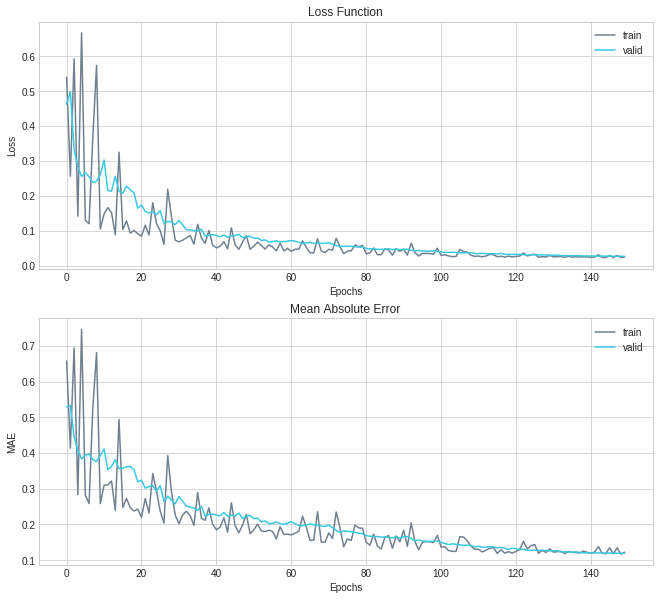

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8785542155423444
EV score. Valid:  0.8770786852354027
EV score. Test:  0.8456489673911939
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8766703243481053
R2 score. Valid:  0.8770442507255947
R2 score. Test:  0.8427553511030007
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.026879413189198634
MSE score. Valid:  0.023712651139047292
MSE score. Test:  0.036129877388960965
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.11853970185845299
MAE score. Valid:  0.11793279979485541
MAE score. Test:  0.13565496791154147
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.0916804790496828
MdAE score. Valid:  0.10734720230102557
MdAE score. Test:  0.09922427177429194


In [14]:
history_plot(history,50)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
ti='MLP; \nNumeric Features; \nAverage Math Proficiency'
scores(ti,y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

In [15]:
mlp_model2=mlp_model()
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model2.fit(X_train2,y_train2, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 315618816.6591 - mean_absolute_error: 3022.1221 - val_loss: 827.2342 - val_mean_absolute_error: 26.8534

Epoch 00001: val_loss improved from inf to 827.23415, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 10548.5718 - mean_absolute_error: 51.9285 - val_loss: 0.8188 - val_mean_absolute_error: 0.7455

Epoch 00002: val_loss improved from 827.23415 to 0.81884, saving model to weights.passnyc.hdf5
Epoch 3/200
 - 0s - loss: 2788320.4205 - mean_absolute_error: 380.6857 - val_loss: 40722.0128 - val_mean_absolute_error: 185.4985

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 0s - loss: 14113.6250 - mean_absolute_error: 37.8431 - val_loss: 95.7475 - val_mean_absolute_error: 8.6382

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 0s - loss: 17946.4167 - mean_absolute_error: 40.8348 - val_loss: 39673.8677 - val_mean_absolute_error: 183.6374

Epoch 00005: val_loss did not improve
Epoch 6/200
 - 0s 

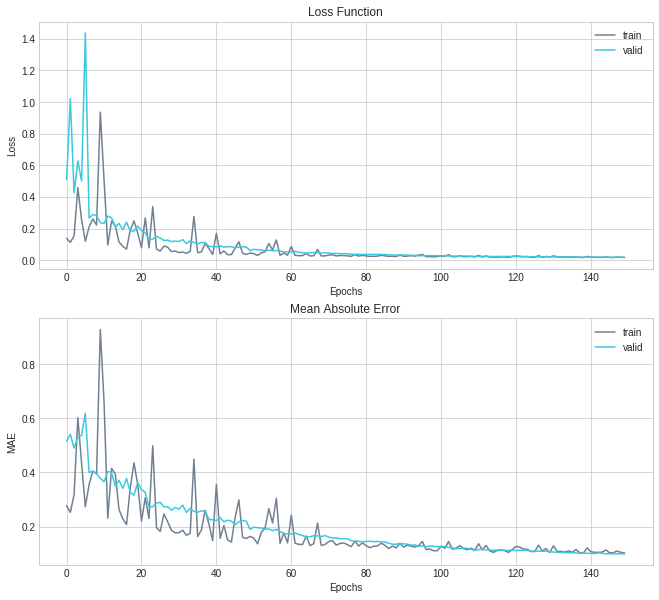

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8617151274874721
EV score. Valid:  0.8668663031884027
EV score. Test:  0.7736109756341614
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8607773165625117
R2 score. Valid:  0.8667975950792675
R2 score. Test:  0.7733060685863654
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.01750642600896381
MSE score. Valid:  0.016679718864622748
MSE score. Test:  0.03639639662300797
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.09561391372205547
MAE score. Valid:  0.10232623185385556
MAE score. Test:  0.1295657615736127
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.07177651405334462
MdAE score. Valid:  0.08820769309997578
MdAE score. Test:  0.0981578493118287


In [16]:
history_plot(history,50)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
ti='MLP; \nNumeric Features; \nAverage ELA Proficiency'
scores(ti,y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### MLP => Numeric & encoded categorical features

In [17]:
def cmlp_model():
    model=Sequential()    
    model.add(Dense(286,input_dim=286))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(286*4))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(286*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model3=cmlp_model()

In [18]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model3.fit(X_train3,y_train3, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid3,y_valid3),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 200340971.7861 - mean_absolute_error: 2408.7838 - val_loss: 3500.5085 - val_mean_absolute_error: 53.9491

Epoch 00001: val_loss improved from inf to 3500.50854, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 3099275.9927 - mean_absolute_error: 287.9676 - val_loss: 16017678.6378 - val_mean_absolute_error: 3687.4455

Epoch 00002: val_loss did not improve
Epoch 3/200
 - 0s - loss: 427796.9038 - mean_absolute_error: 118.2586 - val_loss: 2204.0315 - val_mean_absolute_error: 43.4939

Epoch 00003: val_loss improved from 3500.50854 to 2204.03152, saving model to weights.passnyc.hdf5
Epoch 4/200
 - 0s - loss: 149300.3060 - mean_absolute_error: 135.6716 - val_loss: 2.7293 - val_mean_absolute_error: 1.1490

Epoch 00004: val_loss improved from 2204.03152 to 2.72928, saving model to weights.passnyc.hdf5
Epoch 5/200
 - 0s - loss: 6753.2442 - mean_absolute_error: 37.4515 - val_loss: 62.3634 - val_mean_absolute_er

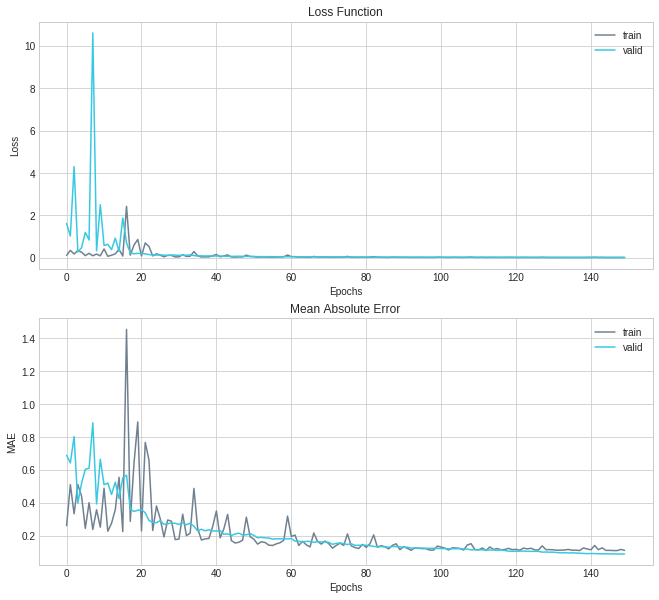

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Encoded Categorical Features; 
Average Math Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9316578987159866
EV score. Valid:  0.8945040489365271
EV score. Test:  0.8605688483728846
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9310903031674888
R2 score. Valid:  0.8938752307034165
R2 score. Test:  0.8580195825049655
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.015018706601739333
MSE score. Valid:  0.020466709742263348
MSE score. Test:  0.032622636838276396
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.08665416556082957
MAE score. Valid:  0.10859428001513945
MAE score. Test:  0.1254571982845664
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.0625297355651857
MdAE score. Valid:  0.07994062423706039
MdAE score. Test:  0.09038319

In [19]:
history_plot(history,50)
mlp_model3.load_weights(fw)
y_train_mlp3=mlp_model3.predict(X_train3)
y_valid_mlp3=mlp_model3.predict(X_valid3)
y_test_mlp3=mlp_model3.predict(X_test3)
ti='MLP; \nNumeric & Encoded Categorical Features; \nAverage Math Proficiency'
scores(ti,y_train3,y_valid3,y_test3,
       y_train_mlp3,y_valid_mlp3,y_test_mlp3)

In [20]:
mlp_model4=cmlp_model()
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model4.fit(X_train4,y_train4, 
                       epochs=200,batch_size=16,verbose=2,
                       validation_data=(X_valid4,y_valid4),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/200
 - 1s - loss: 296490996.2049 - mean_absolute_error: 2933.6919 - val_loss: 3938.5461 - val_mean_absolute_error: 57.8545

Epoch 00001: val_loss improved from inf to 3938.54608, saving model to weights.passnyc.hdf5
Epoch 2/200
 - 0s - loss: 79971.2922 - mean_absolute_error: 152.1770 - val_loss: 3.2430 - val_mean_absolute_error: 0.9965

Epoch 00002: val_loss improved from 3938.54608 to 3.24301, saving model to weights.passnyc.hdf5
Epoch 3/200
 - 0s - loss: 6918291.9409 - mean_absolute_error: 483.9858 - val_loss: 691.0720 - val_mean_absolute_error: 23.9871

Epoch 00003: val_loss did not improve
Epoch 4/200
 - 0s - loss: 79629.8379 - mean_absolute_error: 131.5575 - val_loss: 156300.2586 - val_mean_absolute_error: 364.1113

Epoch 00004: val_loss did not improve
Epoch 5/200
 - 0s - loss: 3611.2244 - mean_absolute_error: 20.4021 - val_loss: 1.1642 - val_mean_absolute_error: 0.9667

Epoch 00005: val_loss improved from 3.24301 to 1.16422,

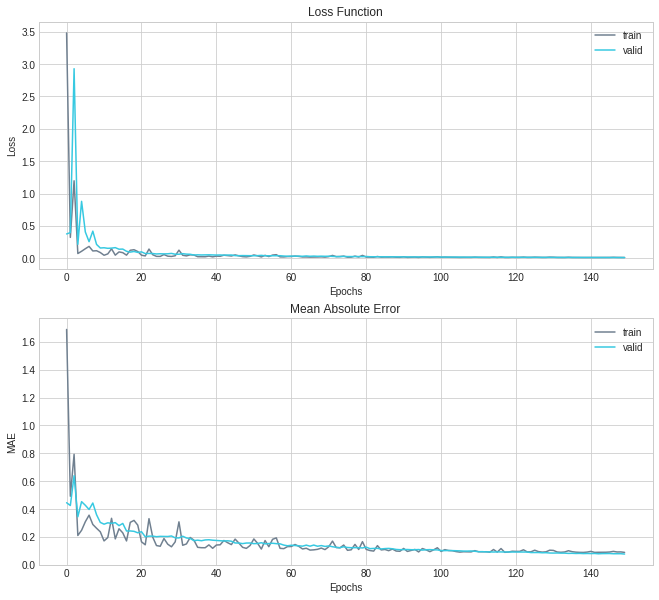

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Encoded Categorical Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.907244943225461
EV score. Valid:  0.8979292529809615
EV score. Test:  0.8527624665766549
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9069014726606338
R2 score. Valid:  0.897929226938904
R2 score. Test:  0.8526091839944067
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.011706587175084203
MSE score. Valid:  0.012781389344786525
MSE score. Test:  0.023664041487463115
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.07628637672213014
MAE score. Valid:  0.08945474912488241
MAE score. Test:  0.10696648176759481
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.0562667751312258
MdAE score. Valid:  0.07283740997314458
MdAE score. Test:  0.0708326435

In [21]:
history_plot(history,50)
mlp_model4.load_weights(fw)
y_train_mlp4=mlp_model4.predict(X_train4)
y_valid_mlp4=mlp_model4.predict(X_valid4)
y_test_mlp4=mlp_model4.predict(X_test4)
ti='MLP; \nNumeric & Encoded Categorical Features; \nAverage ELA Proficiency'
scores(ti,y_train4,y_valid4,y_test4,
       y_train_mlp4,y_valid_mlp4,y_test_mlp4)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Predictions & Real Data</h1>

### Numeric features

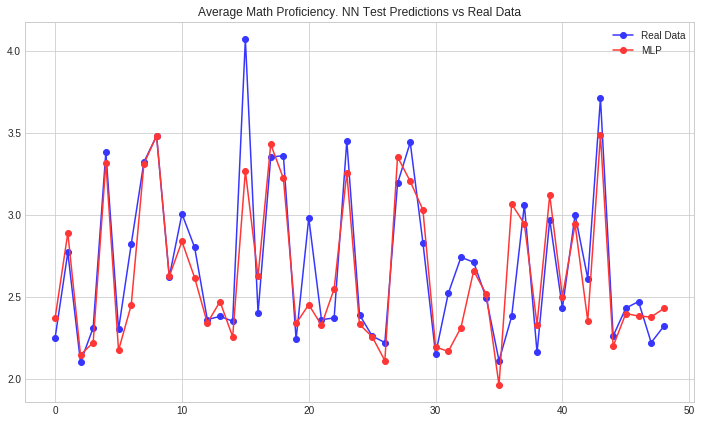

In [22]:
plt.figure(figsize=(12,7))
plt.plot(y_test1[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp1[1:50],'-o',color='#ff3636',label='MLP')
ti="Average Math Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

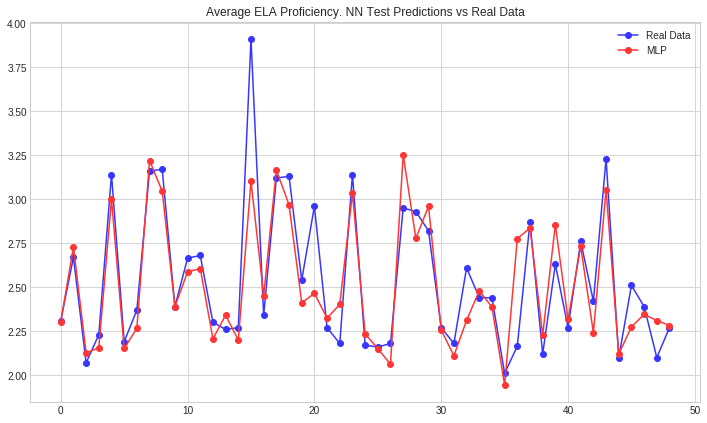

In [23]:
plt.figure(figsize=(12,7))
plt.plot(y_test2[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp2[1:50],'-o',color='#ff3636',label='MLP')
ti="Average ELA Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### Numeric & encoded categorical features

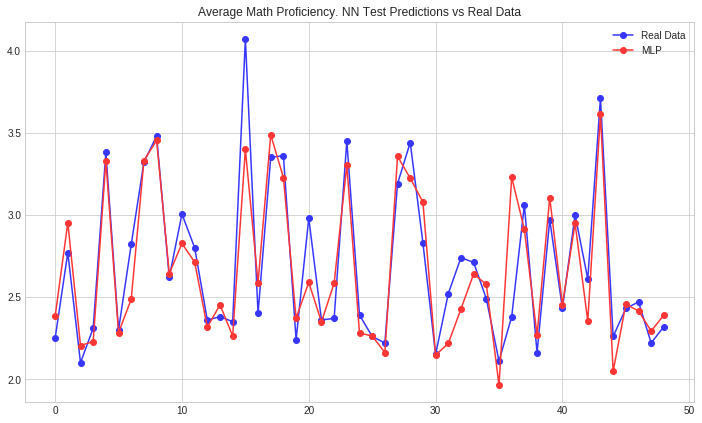

In [24]:
plt.figure(figsize=(12,7))
plt.plot(y_test3[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp3[1:50],'-o',color='#ff3636',label='MLP')
ti="Average Math Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

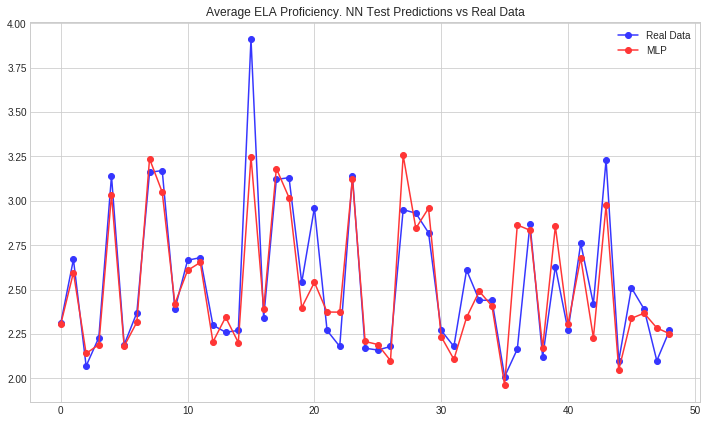

In [25]:
plt.figure(figsize=(12,7))
plt.plot(y_test4[1:50],'-o',color='#3636ff',label='Real Data')
plt.plot(y_test_mlp4[1:50],'-o',color='#ff3636',label='MLP')
ti="Average ELA Proficiency. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

In this case, neural networks were used to predict the indicators of educational outcomes. 

It is difficult to achieve high accuracy here in general since the ultimate goal depends not only on the financing, social environment and professionalism of the staff but also on the personal qualities of the students. 

Adding category variables does not improve the accuracy of predictions because these indicators depend not exactly on geolocations but on the well-being of the surrounding area.

I believe that it is possible to reach at least the same accuracy with neural networks as with regression algorithms like `Gradient Boosting` or `Random Forest`.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>&#x1F310; &nbsp; Let's Go Ahead</h1>
It's time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://www.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)